# Simple MDP Monte Carlo:

**Date:** May 24nd 2023

**Author:** Lucas Jacobs

**Teacher:** Iman Mossavat



Simple MDP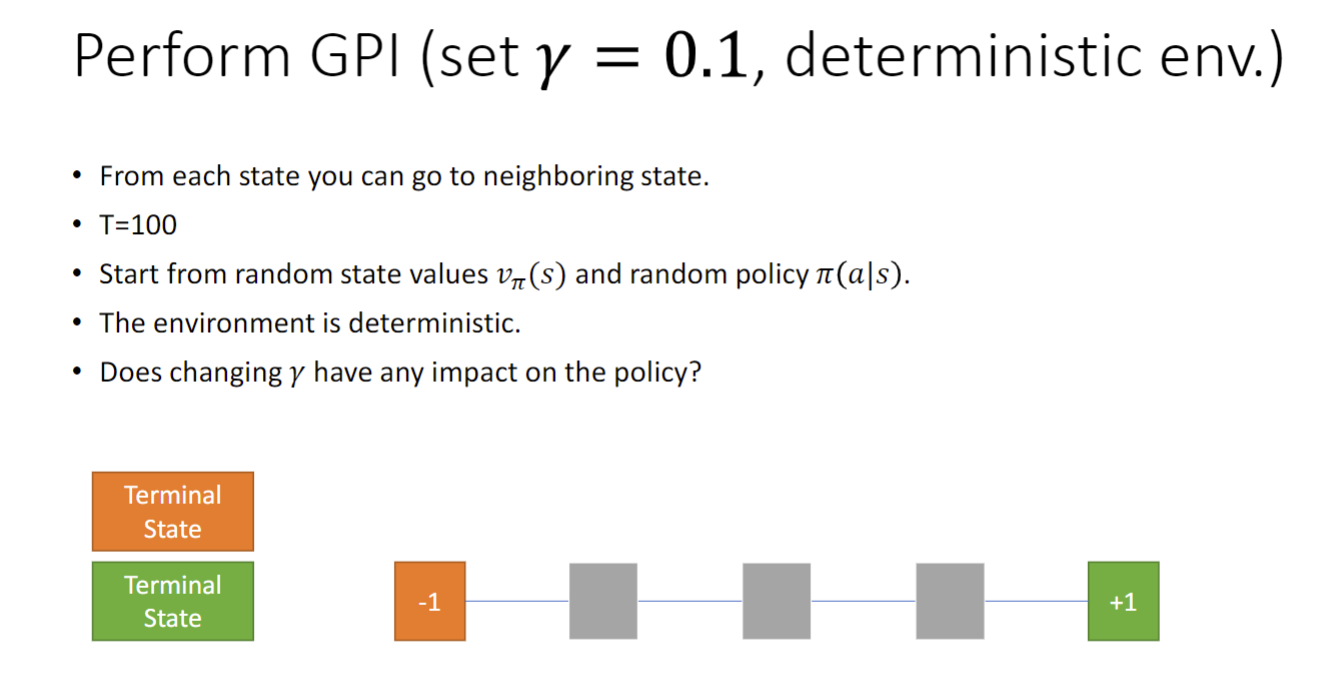

Disclaimer: 
Not rigourously tested as of 21-05-2023
Feedback appreciated. 
Iman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax


Below you can see afew generic functions for generating 2D probability distributions. This can be used to specify discrete transition probabilities 
$$P(\hat{s},r|s,a)$$

In [2]:


beta = 2
def CondProb(nRow, nCol, beta):
  # uses Boltzmann distribution to create a 2D probability distribution 
  # beta is inverse tempreature:
  #   small beta = uniform distribution
  #   large beta: concentration of probability on few entries
  
  cp = np.random.randn(nRow, nCol)


  cp = np.exp(beta * cp)
  cp = cp/np.sum(cp)
  return cp


def printCondProb(cp):
  print(np.array2string(cp, precision=2))
  print(f'marginal column probabilities: {np.array2string(cp.sum(axis=0), precision=2)}')
  print(f'marginal row probabilities:{np.array2string(cp.sum(axis=1), precision=2)}')

cp = CondProb(nRow = 5, nCol = 3, beta = beta)
printCondProb(cp)

def Sample2D(cp):
  # draw one sample according to 2D distribution specified by 2D cp array
  # elements of cp should sum up to 1 and be positive.
  
  
  # np.random.choice can be used to draw samples according to a discrete probability distribution
  # np.random.choice needs 1D arrays of probabilities and objects to choose from

  # first flatten the 2D matrix into a 1D array
  # the objects to choose from are integeres from 0 to nState*nAction-1 (1D index to (state,action) tuples ) 
  
  sample_index = np.random.choice(a=cp.size, size=[], p=cp.flatten())

  # index of row and column based on the flattened index
  idx_row,idx_col = divmod(sample_index, cp.shape[1]) # quotient, remainder = divmod(dividend, divisor)
  return idx_row,idx_col, sample_index

idx_row,idx_col, sample_indices = Sample2D(cp)

print('\nHere is a simple check')
print(f'Selected 1D index: {sample_indices} -  2D index: ({idx_row}, {idx_col}) -  value indexed by 1D array: {cp.flatten()[sample_indices]} - value indexed by tuple {cp[idx_row,idx_col]}' )

[[0.01 0.14 0.04]
 [0.22 0.   0.11]
 [0.01 0.   0.01]
 [0.14 0.01 0.04]
 [0.09 0.   0.17]]
marginal column probabilities: [0.47 0.16 0.37]
marginal row probabilities:[0.18 0.33 0.03 0.2  0.26]

Here is a simple check
Selected 1D index: 1 -  2D index: (0, 1) -  value indexed by 1D array: 0.13899896236892836 - value indexed by tuple 0.13899896236892836


Set up the MDP, plot the transition probabilities 

`mdp_trans_prb = np.zeros((nStates, nActions, nStates, nRewards)) `

Use the following definition:



```
actions = ['l', 'r']
rewards = [-1,0,1]
```



and


```
# Definition:
# mdp_trans_prb[s,1,:,:]   conditional probabilities when the agent is in state s and takes the right action
# mdp_trans_prb[s,0,:,:]   conditional probabilities when the agent is in state s and takes the left action
# the index of rewards and actions are based on the actions and rewards arrays specified above
```

Example: (deterministic environment)



```
mdp_trans_prb[3,0,2,1] = 1 # Agent is in state 3 and takes left, agent state is now 2, and it receives the reward of 0 
```


Plot your transition probabilities



```
fig, ax = plt.subplots(nStates,nActions)

for s in np.arange(nStates):
  for a in np.arange(nActions):
    ax[s,a].imshow(mdp_trans_prb[s,a,:,:])
    ax[s,a].axis('off')

# Columns correspond to actions
# Rows correspond to states
# Color correponds to probability
```




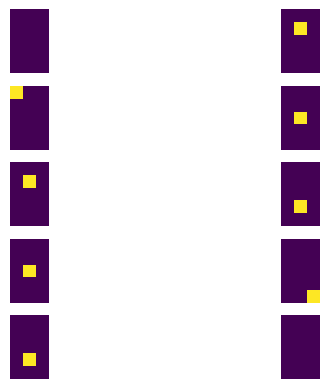

In [3]:
# specification of the MDP

nStates = 5
nActions = 2
nRewards= 3 # different reward levels 
actions = ['l', 'r']



rewards = [-1,0,1] 

state2grid = np.eye(nStates) # links states to grid locations, 1D grid location is counted from left to right

state2action = np.ones((nStates,nActions)) # set of permitted actions in each location
state2action[0,0] = 0 # you are not allowed to go left on the left-most state
state2action[-1,1] = 0 # you are not allowed to go right on the right-most state


mdp_trans_prb = np.zeros((nStates, nActions, nStates, nRewards)) # we can program this differently mdp_trans_prb = np.zeros(nStates, nActions, nStates) and make reward a function of the rest

# Definition:
# mdp_trans_prb[s,1,:,:]   conditional probabilities when the agent is in state s and  takes the right action
# mdp_trans_prb[s,0,:,:]   conditional probabilities when the agent is in state s and  takes the left action
# the index of rewards and actions are based on the actions and rewards arrays specified above

mdp_trans_prb[0,1,1,1] = 1 # the agent is in state 0 and the agent takes right, your state is now 1, the agent gets reward of 0 (the middle entry in the rewards array thus index 1)

mdp_trans_prb[1,0,0,0] = 1 # the agent is in state 1 and the agent takes left,  state is now 0, the agent gets reward of -1 
mdp_trans_prb[1,1,2,1] = 1 # the agent is in state 1 and the agent takes right,  state is now 2, the agent gets reward of 0 

mdp_trans_prb[2,0,1,1] = 1 # the agent is in state 2 and the agent takes left,  state is now 1, the agent gets reward of 0 
mdp_trans_prb[2,1,3,1] = 1 # the agent is in state 2 and the agent takes right,  state is now 3, the agent gets reward of 0 

mdp_trans_prb[3,0,2,1] = 1 # the agent is in state 3 and the agent takes left,  state is now 2, the agent gets reward of 0 
mdp_trans_prb[3,1,4,2] = 1 # the agent is in state 3 and the agent takes right,  state is now 4, the agent gets reward of 1


mdp_trans_prb[4,0,3,1] = 1 # the agent is in state 4, you take left,  state is now 3, the agent gets reward of 0 

# this way of defining MDP allows you to make it probabilistic

fig, ax = plt.subplots(5,2)

for s in np.arange(nStates):
  for a in np.arange(nActions):
    ax[s,a].imshow(mdp_trans_prb[s,a,:,:])
    ax[s,a].axis('off')

# Columns correspond to actions
# Rows correspond to states
# Color correponds to probability


Now we have to declare which states are terminal

In [4]:
terminal_states= [0, nStates-1]

Can you modify your code to take the number of `nStates` as an argument? In other words, it allows for longer or shorter versions of this MDP. 


We will just make a function called 'create_MDP'. This will take 3 parameters: 'nStates', 'nActions', 'nRewards'. You can adjust them to your liking.

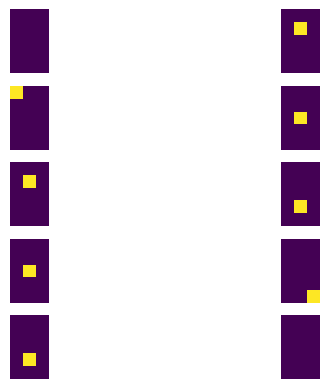

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def create_MDP(nStates, nActions, nRewards):

    state2grid = np.eye(nStates)
    state2action = np.ones((nStates, nActions))
    state2action[0, 0] = 0
    state2action[-1, 1] = 0

    mdp_trans_prb = np.zeros((nStates, nActions, nStates, nRewards))

    mdp_trans_prb[0, 1, 1, 1] = 1

    mdp_trans_prb[1, 0, 0, 0] = 1
    mdp_trans_prb[1, 1, 2, 1] = 1

    mdp_trans_prb[2, 0, 1, 1] = 1
    mdp_trans_prb[2, 1, 3, 1] = 1

    mdp_trans_prb[3, 0, 2, 1] = 1
    mdp_trans_prb[3, 1, 4, 2] = 1

    mdp_trans_prb[4, 0, 3, 1] = 1

    return state2grid, state2action, mdp_trans_prb

nStates = 5
nActions = 2
nRewards = 3

state2grid, state2action, mdp_trans_prb = create_MDP(nStates, nActions, nRewards)

fig, ax = plt.subplots(nStates, nActions)

for s in range(nStates):
    for a in range(nActions):
        ax[s, a].imshow(mdp_trans_prb[s, a, :, :])
        ax[s, a].axis('off')

plt.show()


In the modified environment, can you modify your code to make it probabilistic, if a certain action is taken the probability of it happening is `p`, and with `1-p`, the opposite happens!

So basically we want to add another parameter 'p', which will be used to specify the probability of a action happening. So we adjust the mdp_trans_prb from beining one to beining p and the complement of all these mdp_trans_prb will be 1-p.

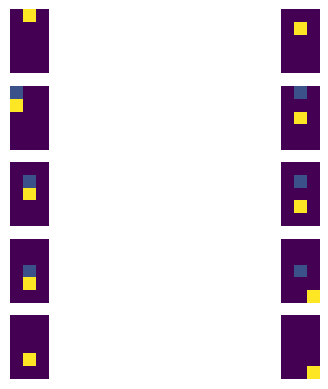

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def create_MDP(nStates, nActions, nRewards, p):
    state2grid = np.eye(nStates)
    state2action = np.ones((nStates, nActions))
    state2action[0, 0] = 0
    state2action[-1, 1] = 0

    mdp_trans_prb = np.zeros((nStates, nActions, nStates, nRewards))

    mdp_trans_prb[0, 1, 1, 1] = p
    mdp_trans_prb[0, 0, 0, 1] = 1 - p

    mdp_trans_prb[1, 0, 0, 0] = 1 - p
    mdp_trans_prb[1, 0, 1, 0] = p
    mdp_trans_prb[1, 1, 2, 1] = p
    mdp_trans_prb[1, 1, 0, 1] = 1 - p

    mdp_trans_prb[2, 0, 1, 1] = 1 - p
    mdp_trans_prb[2, 0, 2, 1] = p
    mdp_trans_prb[2, 1, 3, 1] = p
    mdp_trans_prb[2, 1, 1, 1] = 1 - p

    mdp_trans_prb[3, 0, 2, 1] = 1 - p
    mdp_trans_prb[3, 0, 3, 1] = p
    mdp_trans_prb[3, 1, 4, 2] = p
    mdp_trans_prb[3, 1, 2, 1] = 1 - p

    mdp_trans_prb[4, 0, 3, 1] = 1 - p
    mdp_trans_prb[4, 1, 4, 2] = p

    return state2grid, state2action, mdp_trans_prb

nStates = 5
nActions = 2
nRewards = 3
p = 0.8  # Probability of the specified action happening

state2grid, state2action, mdp_trans_prb = create_MDP(nStates, nActions, nRewards, p)

fig, ax = plt.subplots(nStates, nActions)

for s in range(nStates):
    for a in range(nActions):
        ax[s, a].imshow(mdp_trans_prb[s, a, :, :])
        ax[s, a].axis('off')

plt.show()


In the modified environment, allow your code to specify the reward for any chosen cell, increase the level of available rewards to



```
rewards = [-5,-1,0,1,5] 

```




We will add a another parameter called 'rewards'. This will be a array of different kind of rewards. For example we have 'mdp_trans_prb[0, 1, 1, rewards.index(1)] = p'. It will tell that it needs to set a probability of chanigng from state 0 to 1, taking action 1 (so taking the right action) and receiving reward one to be p. We will get the reward by saying 'reward.index(1). which returns of the array the value '-1'. You can change the reward array according to your liking.

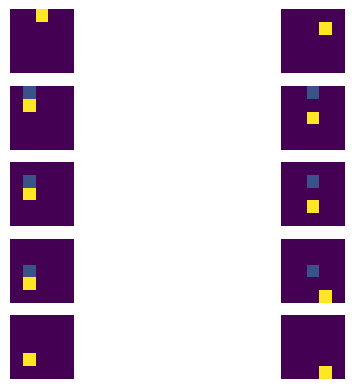

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def create_MDP(nStates, nActions, nRewards, p, rewards):
    state2grid = np.eye(nStates)
    state2action = np.ones((nStates, nActions))
    state2action[0, 0] = 0
    state2action[-1, 1] = 0

    mdp_trans_prb = np.zeros((nStates, nActions, nStates, nRewards))

    mdp_trans_prb[0, 1, 1, rewards.index(1)] = p
    mdp_trans_prb[0, 0, 0, rewards.index(0)] = 1 - p

    mdp_trans_prb[1, 0, 0, rewards.index(-1)] = 1 - p
    mdp_trans_prb[1, 0, 1, rewards.index(-1)] = p
    mdp_trans_prb[1, 1, 2, rewards.index(0)] = p
    mdp_trans_prb[1, 1, 0, rewards.index(0)] = 1 - p

    mdp_trans_prb[2, 0, 1, rewards.index(-1)] = 1 - p
    mdp_trans_prb[2, 0, 2, rewards.index(-1)] = p
    mdp_trans_prb[2, 1, 3, rewards.index(0)] = p
    mdp_trans_prb[2, 1, 1, rewards.index(0)] = 1 - p

    mdp_trans_prb[3, 0, 2, rewards.index(-1)] = 1 - p
    mdp_trans_prb[3, 0, 3, rewards.index(-1)] = p
    mdp_trans_prb[3, 1, 4, rewards.index(1)] = p
    mdp_trans_prb[3, 1, 2, rewards.index(0)] = 1 - p

    mdp_trans_prb[4, 0, 3, rewards.index(-1)] = 1 - p
    mdp_trans_prb[4, 1, 4, rewards.index(1)] = p

    return state2grid, state2action, mdp_trans_prb

nStates = 5
nActions = 2
nRewards = 5
p = 0.8  # Probability of the specified action happening
rewards = [-5, -1, 0, 1, 5]

state2grid, state2action, mdp_trans_prb = create_MDP(nStates, nActions, nRewards, p, rewards)

fig, ax = plt.subplots(nStates, nActions)

for s in range(nStates):
    for a in range(nActions):
        ax[s, a].imshow(mdp_trans_prb[s, a, :, :])
        ax[s, a].axis('off')

plt.show()


Now make a new MDP where the agent has a token that it can spend. When it spends its token the outcome of the action become deterministic, otherwise it is random with probability `p`.

Now create two versions of this MDP.

1.    One where there is a large negative reward at the middle, a small negative reward at one corner, and small positive reward at the right corner.

How does the optimal agent spends its token? What is the impact of the discount factor? 



When the token is higher compared to the rewards, then the agent will be less likely to use the token. Unless, there will be a big positive reward that will outweight the costs.
Furthermore, when the token cost is lower, then the agent will be more willing to spend the token to achieve the outcome.

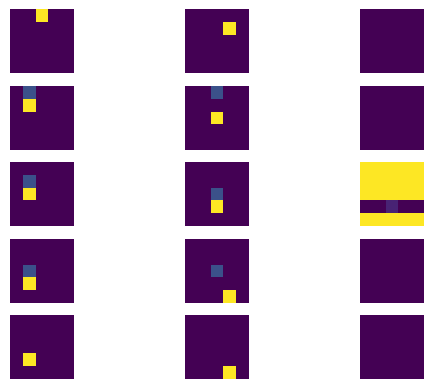

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def create_MDP_with_token(nStates, nActions, nRewards, p, rewards, token_cost):
    state2grid = np.eye(nStates)
    state2action = np.ones((nStates, nActions))
    state2action[0, 0] = 0
    state2action[-1, 1] = 0

    reward_indices = {reward: i for i, reward in enumerate(rewards)}

    mdp_trans_prb = np.zeros((nStates, nActions, nStates, nRewards))

    # Deterministic transitions when spending token
    mdp_trans_prb[2, 2, 3, reward_indices[0]] = 1  # Spend token to transition from state 2 to state 3 with reward 0

    # Probabilistic transitions when not spending token
    mdp_trans_prb[0, 1, 1, reward_indices[1]] = p
    mdp_trans_prb[0, 0, 0, reward_indices[0]] = 1 - p

    mdp_trans_prb[1, 0, 0, reward_indices[-1]] = 1 - p
    mdp_trans_prb[1, 0, 1, reward_indices[-1]] = p
    mdp_trans_prb[1, 1, 2, reward_indices[0]] = p
    mdp_trans_prb[1, 1, 0, reward_indices[0]] = 1 - p

    mdp_trans_prb[2, 0, 1, reward_indices[-1]] = 1 - p
    mdp_trans_prb[2, 0, 2, reward_indices[-1]] = p
    mdp_trans_prb[2, 1, 3, reward_indices[0]] = p
    mdp_trans_prb[2, 1, 2, reward_indices[0]] = 1 - p

    mdp_trans_prb[3, 0, 2, reward_indices[-1]] = 1 - p
    mdp_trans_prb[3, 0, 3, reward_indices[-1]] = p
    mdp_trans_prb[3, 1, 4, reward_indices[1]] = p
    mdp_trans_prb[3, 1, 2, reward_indices[0]] = 1 - p

    mdp_trans_prb[4, 0, 3, reward_indices[-1]] = 1 - p
    mdp_trans_prb[4, 1, 4, reward_indices[1]] = p

    # Apply token cost
    mdp_trans_prb[2, 2, 3, :] -= token_cost

    return state2grid, state2action, mdp_trans_prb

nStates = 5
nActions = 3  # Including spend action
nRewards = 5
p = 0.8  # Probability of the specified action happening
rewards = [-5, -1, 0, 1, 5]
token_cost = 10  # Cost of spending token

state2grid, state2action, mdp_trans_prb = create_MDP_with_token(nStates, nActions, nRewards, p, rewards, token_cost)

fig, ax = plt.subplots(nStates, nActions)

for s in range(nStates):
    for a in range(nActions):
        ax[s, a].imshow(mdp_trans_prb[s, a, :, :])
        ax[s, a].axis('off')

plt.show()


Now that we are done with our MDP, we can also take a look at our policies.

The Boltzmann Policy for a token free MDP:

$$\pi(a_i|s,\beta )=\frac{\exp(\beta Q(s,a_i))}{\sum_{\hat{a} \in A(s)} \exp (\beta Q(s,\hat{a}) }$$
where $\beta$ is a scalar that controls how aggressively the policy follows the best action, when beta is large the policy almost surely opts for taking the action with maximum Q function. When $\beta=0$ the algorithm ignores the Q function. This function is called soft-max and often appears in machine learning.  

see `scipy.special.softmax`

In [9]:

def validPolicy(policy, state2action):
  # makes sure the policy allows only for valid actions a \in A(s)
  
  policy = policy * state2action # make sure probability is only assigned to viable actions
  policy = policy/np.sum(policy,axis=1).reshape(-1,1) # make sure every row is normalized (sums up to one.)
  return policy

beta = 1
Q = np.zeros((nStates, nActions))
policy1 = validPolicy(softmax(beta * Q, axis=1), state2action)

policy2 = validPolicy(1/nActions * np.ones((nStates, nActions)), state2action)

print('Boltzmann policy for beta = 1, and Q = 0 for all states and actions')
print(policy1)
print('\nRandom Policy')
print(policy2)

Boltzmann policy for beta = 1, and Q = 0 for all states and actions
[[0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.5        0.         0.5       ]]

Random Policy
[[0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.5        0.         0.5       ]]


Now, perform Monte Carlo simulation on the original MDP. 

The agent starts at cell 1, right next to the maximum negative reward.
The episode is maximum 10 steps, discount factor is 1, simulate 100 episodes. The agent follows a random policy.




```
policy = 1/nActions * np.ones((nStates, nActions))
```

Note the indices in the episode below, state and action indices start from 0 and end in T-1, and rewards index starts from 1 and ends in T.
$$ S_0, A_0, R_1, S_1, A_1, R_2, \cdots, S_{T-1}, A_{T-1}, R_T $$
Here you take T actions and the index of the last state you see is T-1. 

If the episode is truncated by for example hitting a terminal state, the episode will look differently. In this case, the last state at time t the indexing at the end would look like $$S_0, A_0, R_1, S_1, A_1, R_2, \cdots, S_{t-1}, A_{t-1}, R_t, S_t$$ which is different than when we stop at itaration T. It is because $S_t$ is a member of the set of terminal states.

In [10]:
T = 10
nEpisodes= 100
gamma = 1 # discount factor


policy = validPolicy(1/nActions * np.ones((nStates, nActions)),state2action)

state_mc = np.empty((nEpisodes,T+1), dtype=int) # mind the size (there is an extra row, but makes implementation easier)
state_mc.fill(np.nan)

action_mc = np.empty((nEpisodes,T+1), dtype=str) # mind the size (there is an extra row, but makes implementation easier)
action_mc.fill(np.nan)


reward_mc = np.empty((nEpisodes,T+1), dtype=int) # mind the size (there is an extra row, but makes implementation easier)
reward_mc.fill(np.nan)
reward_mc[:,0]=0 # set the reward at step 0 to zero (this is undefined mathematically, our code never overwrites it, and we do not want a NaN there because it will be omitted). There is a probalby a more elegant way to do this.

After initialization we write the main-loop.

Again, note the indices in the episode below, state and action indices start from 0 and end in T-1, and rewards index starts from 1 and ends in T. 
$$ S_0, A_0, R_1, S_1, A_1, R_2, \cdots, S_{T-1}, A_{T-1}, R_T $$




In [11]:
for episode in np.arange(nEpisodes):
  state_mc[episode,0]=2
  for t in np.arange(T): # mind the range! 
    s = state_mc[episode,t]
    # draw an action depending on the state
    p = policy[s,:] # policy at state s, 


    a = np.random.choice(a=nActions, size=[], p=p) # take a random action according to the policy

    action_mc[episode,t] = actions[a]

    transitionProb = mdp_trans_prb[s, a, :, :]
    state_mc[episode,t+1], reward_idx,_ = Sample2D(transitionProb)
    reward_mc[episode,t+1] = rewards[reward_idx]
    if state_mc[episode,t+1] in terminal_states:
      break
  
  if divmod(episode, 100)==0:
    print(f'simulated episodes: {episode}')

IndexError: list index out of range

We can print the sampled episodes. 

*   Note that unless we miss the state T, we need to clear the intial NaNs.  
*   If we end up in a terminal state, we know its value: the final reward


We need these observations to take care of the estiamtion. 

This code that you wrote is not correct see down below the code that I provided. This is a updated way of your code!

In [ ]:
def printMC(state_mc):
  if state_mc.shape[0]==state_mc.size: # true if 1D array
    state_mc=state_mc.reshape(1,-1) # force it to a 2D array with 1 row


  # prints state_mc, action_mc, and reward_mc without the nan

  for episode in state_mc:
    # iterating the rows of state_mc
    if episode[0].dtype=='int64':
      print(episode[(episode != -9223372036854775808)])
    else:
      x = np.copy(episode[(episode != 'n')])
      # print('\u2190 \u2191 \u2192 \u2193') left, up, right, down
      x[x=='l'] = '\u2190'
      x[x=='r'] = '\u2192'

      print(x) 


print('sample state:')
printMC(state_mc[0])
print('sample action:')
printMC(action_mc[0])
print('sample reward:')
printMC(reward_mc[0])

sample state:


C:\Users\2003l\AppData\Local\Temp\ipykernel_30528\957426144.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  x = np.copy(episode[(episode != 'n')])
C:\Users\2003l\AppData\Local\Temp\ipykernel_30528\957426144.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  x[x=='l'] = '\u2190'


ValueError: invalid literal for int() with base 10: '←'

This updated code: 
- we will correctly handle datatypes of the array.
- The x was assigned to arrow characters, which is not possible to do directly with a type int.

In [ ]:
def printMC(sequence):
    if sequence.ndim == 1:  # If 1D array, convert to 2D with one row
        sequence = sequence.reshape(1, -1)

    for episode in sequence:
        # Convert action labels to arrows
        actions = np.where(episode != 'n', episode, '')  # Replace 'n' with empty string
        actions = np.where(actions == 'l', '\u2190', actions)
        actions = np.where(actions == 'r', '\u2192', actions)

        print(actions)
        
print('Sample state:')
printMC(state_mc[0])
print('Sample action:')
printMC(action_mc[0])
print('Sample reward:')
printMC(reward_mc[0])

Sample state:
['-2147483648' '-2147483648' '-2147483648' '-2147483648' '-2147483648'
 '-2147483648' '-2147483648' '-2147483648' '-2147483648' '-2147483648'
 '-2147483648']
Sample action:
['' '' '' '' '' '' '' '' '' '' '']
Sample reward:
['0' '-2147483648' '-2147483648' '-2147483648' '-2147483648' '-2147483648'
 '-2147483648' '-2147483648' '-2147483648' '-2147483648' '-2147483648']


C:\Users\2003l\AppData\Local\Temp\ipykernel_30528\2053010835.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  actions = np.where(episode != 'n', episode, '')  # Replace 'n' with empty string


Now the only wrong thing is, instead of showing for the int 'NaN', it will just show the lowest possible integer.

Now we want to use these simulated episodes to **estimate** the Q values. We need to estimate them because we no longer have the transition probabilities. 

See Page 92 of the Sutton and Barto book. 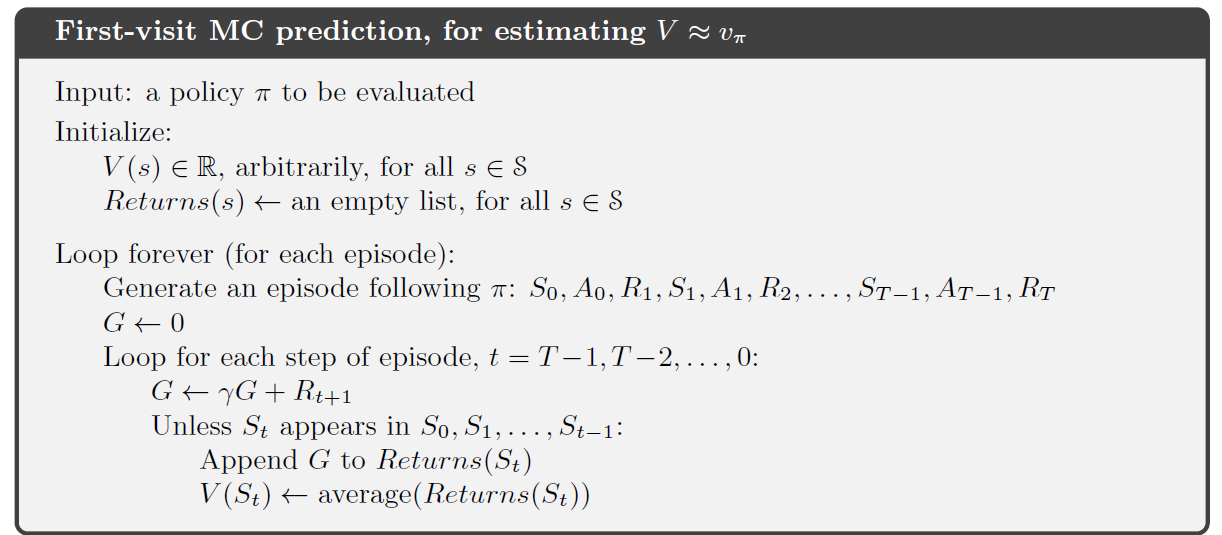

First, for every state we create a list. The list will collect the return for all the first occurances of that state. The average value of returns for each state is taken as the estiamte for the value of that state.

In [ ]:
V = np.zeros((nStates))
Returns = [[] for _ in range(nStates)] # list of empty lists

for episode in np.arange(nEpisodes):
  G= 0.0 # cumulative discounted reward
  state_mc_= state_mc[episode, state_mc[episode, :]!= -9223372036854775808]
  
  # check if we hit T or not
  t= state_mc_.shape[0]
  if t != T:
    # if not, we hit a terminal state
    # in this case, the last reward is the value of this state
    s = state_mc_[-1] # index of the last element in Python is -1
    Returns[s].append(reward_mc[episode, t-1])
    V[s]=np.mean(Returns[s]) # remember the comment on indexing above
    state_mc_= np.delete(state_mc_, -1) # remove the last terminal state


  for t in np.arange(state_mc_.shape[0]-1,-1,-1):
    G= gamma * G + reward_mc[episode,t+1]
    s = state_mc_[t]
    Returns[s].append(G)
    V[s]=np.mean(Returns[s])


IndexError: index 11 is out of bounds for axis 1 with size 11

Let us calculate the Q values
$$Q(s,a)=\sum_{\hat{s},r} P(\hat{s},r|s,a)[r+\gamma V_{\pi}(\hat{s})]$$

We have the elements in the formula. Note that the only dependcy on the policy is via $V(s)$. 
Note that this needs the knowledge of $P(\hat{s},r|s,a)$ that defies the purpose of doing Monte-Carlo. We need a different Process.

In [ ]:
Q = np.empty((nStates, nActions), dtype=float)
for s in np.arange(nStates):
  for a in np.arange(nActions):
    Q[s,a]= 0
    Pt = mdp_trans_prb[s,a,:,:]
    for s_hat in np.arange(nStates):
      for r in np.arange(nRewards):
        Q[s,a] += Pt[s_hat, r] * (rewards [r] + gamma * V[s_hat])


print(Q)
        
beta = 1
policy1 = validPolicy(softmax(beta * Q, axis=1), state2action)

print(policy1)

[[ 0.   0.8]
 [-1.   0. ]
 [-1.   0. ]
 [-1.   0.8]
 [-1.   0.8]]
[[0.         1.        ]
 [0.26894142 0.73105858]
 [0.26894142 0.73105858]
 [0.14185106 0.85814894]
 [1.         0.        ]]


This version of the Monte Carlo allows us to estimate the Q function. Sutton and Barto, Page 99.
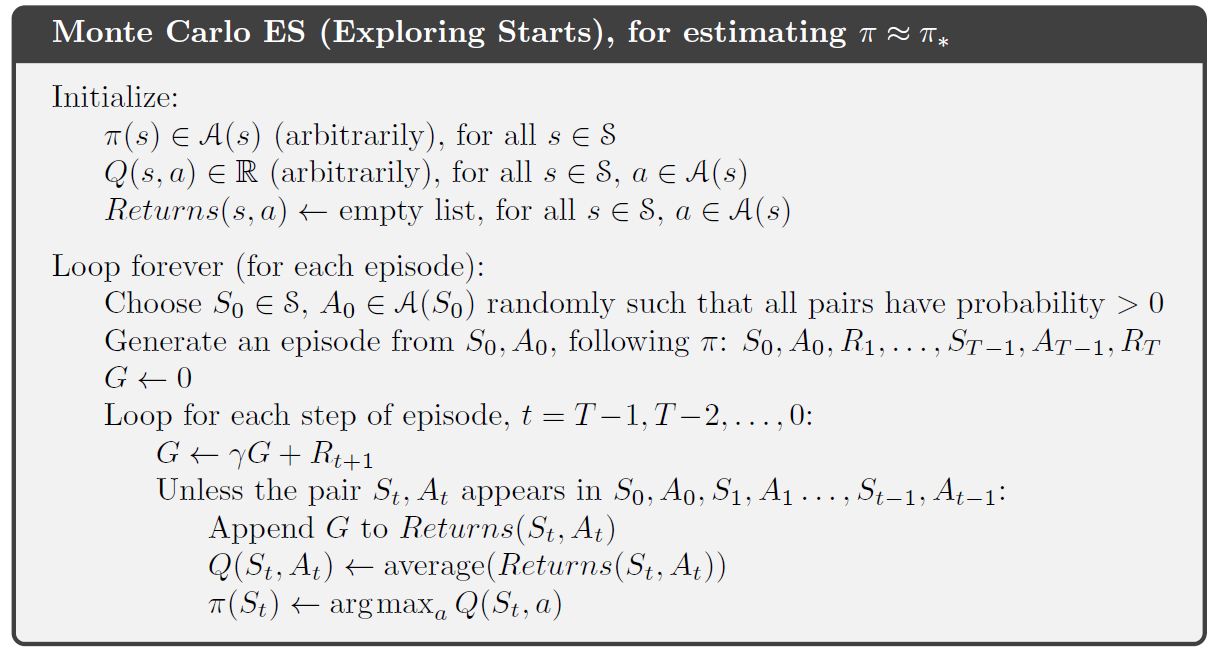

A tiny Python reminder.
First let us make a Tuple of actions and steps for a given episode

In [ ]:
z=zip(state_mc[0],action_mc[0])
next(z)


(2, 'r')

Now we iterate over z, the role of the enumerate is to give us the index i.

In [ ]:
z=zip(state_mc[0],action_mc[0])

for i,z0 in enumerate(z):
  print(f'i: {i}, s: {state_mc[0,i]}, a: {action_mc[0,i]}, (s,a): {z0}')

i: 0, s: 2, a: r, (s,a): (2, 'r')
i: 1, s: 3, a: r, (s,a): (3, 'r')
i: 2, s: 4, a: n, (s,a): (4, 'n')
i: 3, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 4, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 5, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 6, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 7, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 8, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 9, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 10, s: -2147483648, a: n, (s,a): (-2147483648, 'n')


We can write this even more concisely

In [ ]:
for i,z0 in enumerate(zip(state_mc[0],action_mc[0])):
  print(f'i: {i}, s: {state_mc[0,i]}, a: {action_mc[0,i]}, (s,a): {z0}')

i: 0, s: 2, a: r, (s,a): (2, 'r')
i: 1, s: 3, a: r, (s,a): (3, 'r')
i: 2, s: 4, a: n, (s,a): (4, 'n')
i: 3, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 4, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 5, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 6, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 7, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 8, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 9, s: -2147483648, a: n, (s,a): (-2147483648, 'n')
i: 10, s: -2147483648, a: n, (s,a): (-2147483648, 'n')


We can now add a filter to remvoe NaN. This is called a list comprehension, and we also got rid of the enumerate, because we do not need the index. Note the last entry, does not have a legitiamte action. Why?

In [ ]:
t=[z0 for z0 in zip(state_mc[0],action_mc[0], reward_mc[0]) if z0[0] != -9223372036854775808]
t

[(-2147483648, 'n', 0),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648),
 (-2147483648, 'n', -2147483648)]

Now code the **Monte Carlo ES** algorithm. Note that in this algorithm, you use a greedy policy, but you start form a random state-action pair (that has to be a legitimate one $a\in A(s)$). 

I used several things that where specified above in both the hints as well as the code that explained under the section First-visit MC prediction, for estimating V = vpi.
- To begin, the V and Q are used to estimate values of states or state-action pairs. 
- Used the monte carlo method to estimate a value of state.
- I used the method to calculate G for each time step in an episode. (cumulative discounted rewards)
- I also used the method or algorithm to update the value of Q[s, a] based on the mean return.

What this algorithm does is, estimating a stat-action and a policy in a RL envrironment. It uses the Monte carlo evaluation and exploration strategies. The code returns the final state-action value and the learned policy.

In [ ]:
import numpy as np

def monte_carlo_es(env, num_episodes):
    Q = np.zeros((env.nStates, env.nActions))
    Returns = [[] for _ in range(env.nStates)]
    policy = {}

    for episode in range(num_episodes):
        G = 0.0
        state_mc_ = env.state_mc[episode, env.state_mc[episode, :] != -9223372036854775808]
        t = state_mc_.shape[0]

        if t != env.T:
            s = state_mc_[-1]
            Returns[s].append(env.reward_mc[episode, t-1])
            V[s] = np.mean(Returns[s])
            state_mc_ = np.delete(state_mc_, -1)

        for t in range(state_mc_.shape[0] - 1, -1, -1):
            G = env.gamma * G + env.reward_mc[episode, t+1]
            s = state_mc_[t]
            Returns[s].append(G)
            V[s] = np.mean(Returns[s])

        for s in range(env.nStates):
            for a in range(env.nActions):
                Q[s, a] = 0
                Pt = env.mdp_trans_prb[s, a, :, :]
                for s_hat in range(env.nStates):
                    for r in range(env.nRewards):
                        Q[s, a] += Pt[s_hat, r] * (env.rewards[r] + env.gamma * V[s_hat])
        
        # Update the policy picks the max value of the q-values.
        policy[s] = np.argmax(Q[s])

    return Q, policy


Next Algorithm on the line is the epsilon-soft policy version, Page 101 of Sutton and Barto. If you have made the ES algorithm, this should be a straightforward extension..

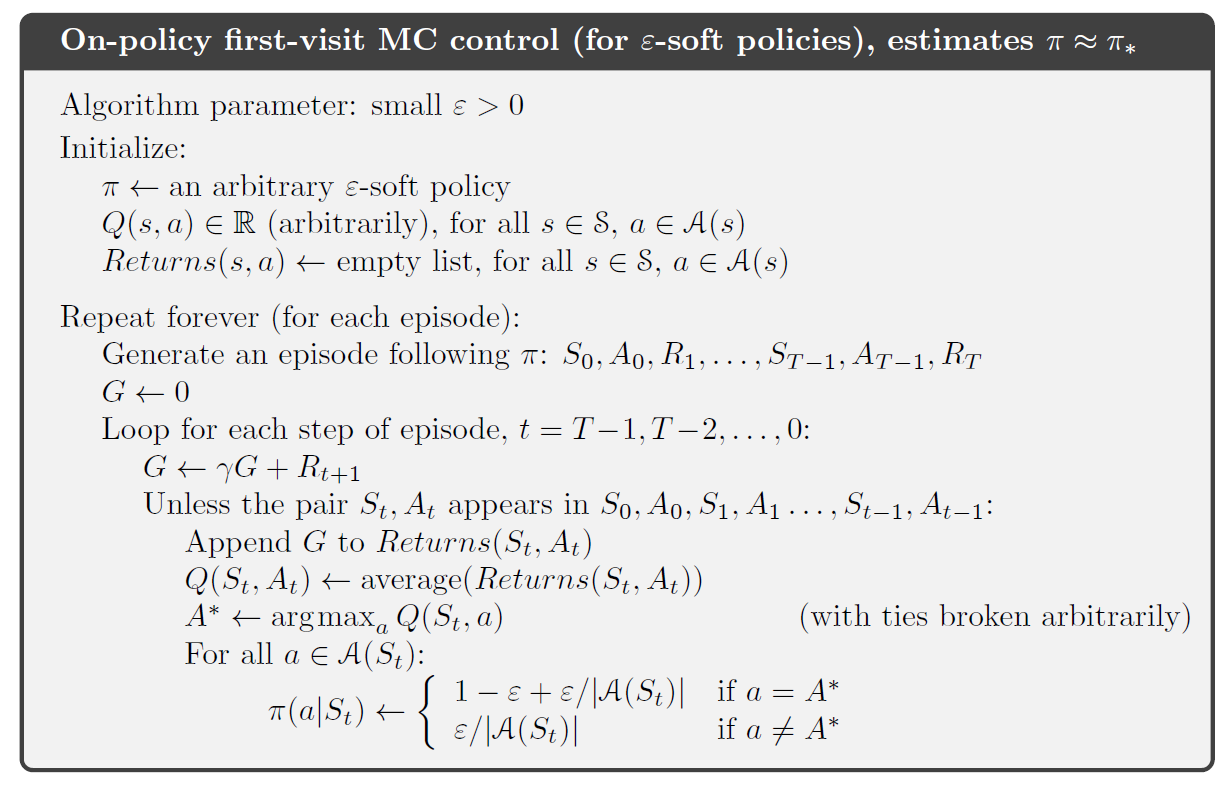

The main difference wit this one is that, instead of selecting the best action based on the highest Q-value, we add randomness to it by using the episilon-soft policy.
With the P of epsilon, we choose a random action. Furthermore, with epsilon -1, the best actions are randomly selected. This brings more exploration because even though Q-values will say a particular action is optimal. So in conclusion, by adding randomness, you force it to find other actions and which will increase the chance of finding a better policy.


In [ ]:
def monte_carlo_es_soft(env, num_episodes, epsilon=0.1):
    Q = np.zeros((env.nStates, env.nActions))
    Returns = np.zeros((env.nStates, env.nActions))  # Track the sum of returns for each state-action pair
    N = np.zeros((nStates, env.nActions))  # Track the number of times each state-action pair is visited
    policy = {}

    for episode in range(num_episodes):
        G = 0.0
        state_mc_ = env.state_mc[episode, env.state_mc[episode, :] != -9223372036854775808]
        t = state_mc_.shape[0]

        if t != env.T:
            s = state_mc_[-1]
            Returns[s, :] += env.reward_mc[episode, t-1]
            N[s, :] += 1
            state_mc_ = np.delete(state_mc_, -1)

        for t in range(state_mc_.shape[0] - 1, -1, -1):
            G = env.gamma * G + env.reward_mc[episode, t+1]
            s = state_mc_[t]
            a = policy.get(s)
            Returns[s, a] += G
            N[s, a] += 1
            Q[s, a] = Returns[s, a] / N[s, a]  # Update the action-value function for state-action pair (s, a)

        for s in range(env.nStates):
            valid_actions = env.get_valid_actions(s)
            if len(valid_actions) > 0:
                if np.random.uniform() < epsilon:
                    probabilities = np.ones(len(valid_actions)) * epsilon / len(valid_actions)
                    policy[s] = np.random.choice(valid_actions, p=probabilities)
                else:
                    best_actions = [a for a in range(env.nActions) if Q[s, a] == np.max(Q[s, valid_actions])]
                    policy[s] = np.random.choice(best_actions)

    return Q, policy


Note: I could not really test my code due to that some code that was in this notebook, didnt work properly.

Next on the line is the Racetrack Exercise 5.12, Page 111 of Sutton and Barto. See the description from sutton and Barto, implement the epsilon greedy algorithm for this excercise. 


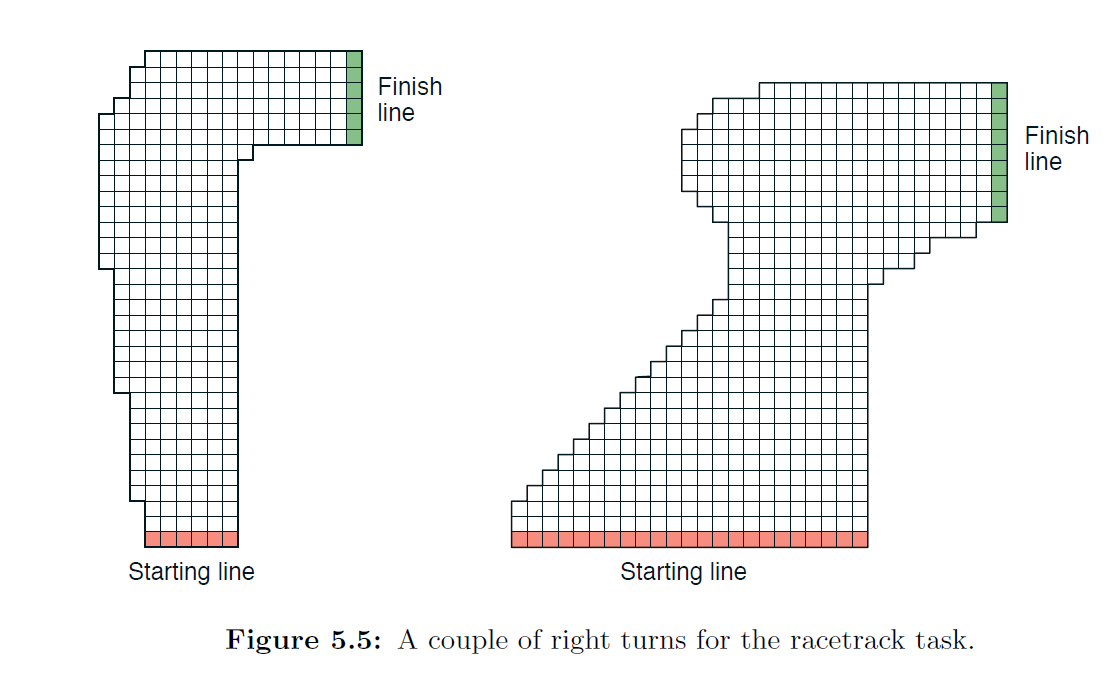